# AI Assessment - Click Advertisement Prediction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA - Exploratory Data Analysis

In [2]:
data = pd.read_csv('/Users/anshagarwal/Desktop/AI Assignment/advertising-1.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
duplicate = data[data.duplicated()]
print(duplicate.shape)

(0, 10)


In [7]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Text(0.5, 0, 'Age')

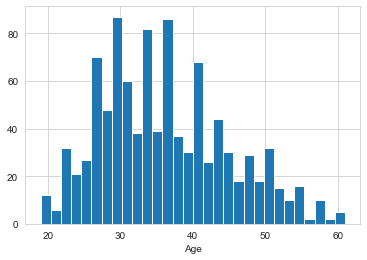

In [9]:
sns.set_style('whitegrid')
data['Age'].hist(bins=30)
plt.xlabel('Age')

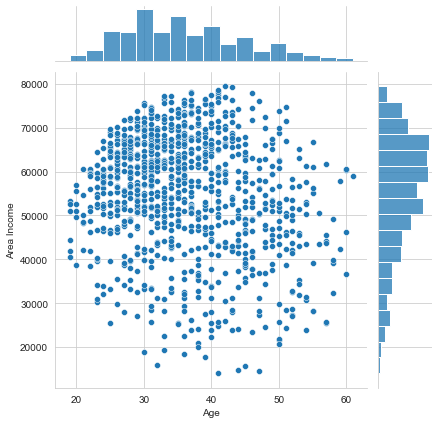

In [10]:
sns.jointplot(x='Age',y='Area Income',data=data)

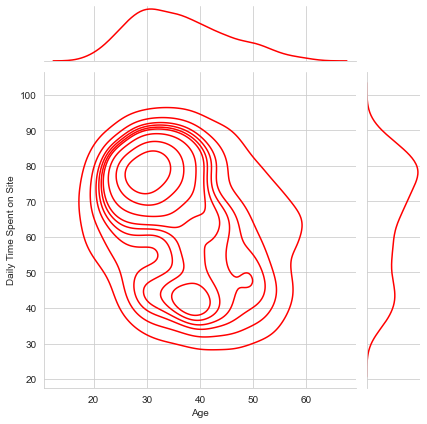

In [11]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data,color='red',kind='kde');

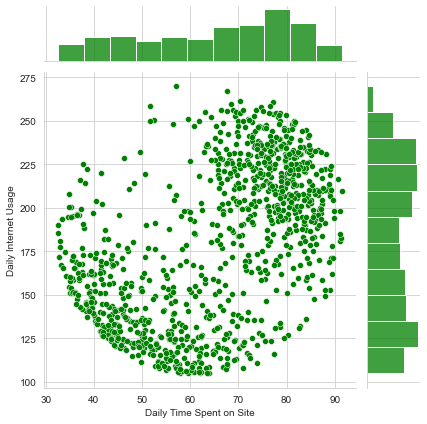

In [12]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='green')

# Model Building using ANN Keras 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 5)
(300, 5)
(700,)
(300,)


In [23]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [25]:
#Initialising ANN
ann = tf.keras.models.Sequential()

2022-11-05 22:51:38.153763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# define the keras model
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [27]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [28]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [29]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.6988 - accuracy: 0.4700
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5600
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6157
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6571
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7257
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7886
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8614
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8957
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.9271
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.9457
Epoch 11/

22/22 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9743
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9743
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9743
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9743
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9743
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9743
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9743
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9743
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9743
Epoch 92/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9743
Epoch 93/100


In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 1ms/step


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test,y_pred)
print('The accuracy score is:', score)

[[159   5]
 [  7 129]]
The accuracy score is: 0.96


In [35]:
#Saving created neural network
import pickle
pickle_out = open("ANN_Model.pkl","wb")
pickle.dump(ann, pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://955ab8be-b69b-4f19-85d7-0d917f4b7871/assets


# THANK YOU